In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import mpc
import matplotlib.pyplot as plt
import numpy as np


In [12]:
horizon = 8
t = 0.1

u = mpc.newMPC(
    np.array([1, 0, 0, 0, 0, 0]), np.array([0, 0, 0, 0, 0, 0]), horizon=horizon, t=t
)
XH = mpc.get_XH(horizon, t=t)
u

Solution found!


/home/ekter/Documents/python/.venv/lib/python3.12/site-packages/qpsolvers/conversions/ensure_sparse_matrices.py:24: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 1.00000277e+00,  1.86991407e-14, -1.26023430e-15, -1.31990178e-15,
        8.29817231e-12, -3.96625919e-12,  2.28059992e-04, -3.57560740e-04,
        1.85433166e-03,  1.26415497e-03, -5.48612129e-04, -1.13881135e-03,
       -1.81267115e-03, -2.40287836e-03, -3.56142078e-03, -4.15162821e-03,
       -7.71878708e-03, -8.30899479e-03, -5.12397446e-01, -5.45364250e-01,
       -5.00001385e+00, -5.00001385e+00,  1.00000277e+00])

In [13]:
XH@u

array([ 1.00000005e+00,  3.32570872e-05,  5.10232949e-05,  3.51033794e-04,
        5.85628634e-07,  5.85620336e-06,  1.00000277e+00,  1.00006799e+00,
       -8.01521417e-04, -1.22358141e-03, -2.15058381e-02,  6.48747020e-07,
        1.17579702e-05,  1.00000277e+00,  9.99973856e-01,  4.49910513e-04,
        5.42486709e-04, -2.86164268e-02,  6.55081387e-07,  1.76599624e-05,
        1.00000277e+00,  9.99911352e-01,  1.05934513e-03,  1.71517518e-03,
       -2.35977266e-02,  6.55722823e-07,  2.35620346e-05,  1.00000277e+00,
        9.99831654e-01,  1.97046855e-03,  3.21045882e-03,  7.87507711e-03,
        6.55787174e-07,  2.94641088e-05,  1.00000277e+00,  9.99649075e-01,
        4.09339380e-03,  6.63599194e-03,  8.25119220e-03,  6.55793891e-07,
        3.53661858e-05,  1.00000277e+00,  9.77754405e-01,  2.71593720e-01,
        4.17421707e-01, -3.64064937e-04,  3.30323912e-05,  3.65034229e-04,
        1.00000277e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

array([[ 2.28059992e-04, -3.57560740e-04],
       [ 1.85433166e-03,  1.26415497e-03],
       [-5.48612129e-04, -1.13881135e-03],
       [-1.81267115e-03, -2.40287836e-03],
       [-3.56142078e-03, -4.15162821e-03],
       [-7.71878708e-03, -8.30899479e-03],
       [-5.12397446e-01, -5.45364250e-01],
       [-5.00001385e+00, -5.00001385e+00]])

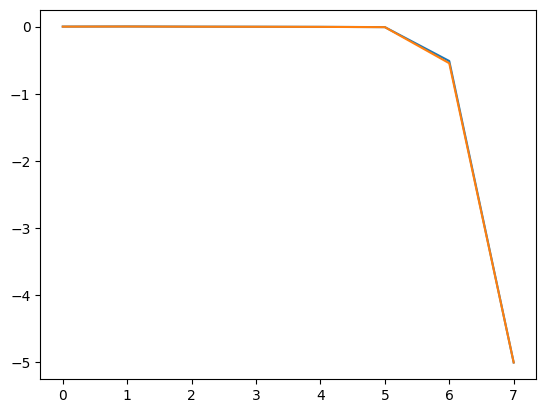

In [14]:
u_inputs = u[6:-1].reshape((-1,2))
plt.plot(u_inputs)
u_inputs

In [15]:
x_states = (XH@u).reshape((-1,7))[:, 0:6]
x_states


array([[ 1.00000005e+00,  3.32570872e-05,  5.10232949e-05,
         3.51033794e-04,  5.85628634e-07,  5.85620336e-06],
       [ 1.00006799e+00, -8.01521417e-04, -1.22358141e-03,
        -2.15058381e-02,  6.48747020e-07,  1.17579702e-05],
       [ 9.99973856e-01,  4.49910513e-04,  5.42486709e-04,
        -2.86164268e-02,  6.55081387e-07,  1.76599624e-05],
       [ 9.99911352e-01,  1.05934513e-03,  1.71517518e-03,
        -2.35977266e-02,  6.55722823e-07,  2.35620346e-05],
       [ 9.99831654e-01,  1.97046855e-03,  3.21045882e-03,
         7.87507711e-03,  6.55787174e-07,  2.94641088e-05],
       [ 9.99649075e-01,  4.09339380e-03,  6.63599194e-03,
         8.25119220e-03,  6.55793891e-07,  3.53661858e-05],
       [ 9.77754405e-01,  2.71593720e-01,  4.17421707e-01,
        -3.64064937e-04,  3.30323912e-05,  3.65034229e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

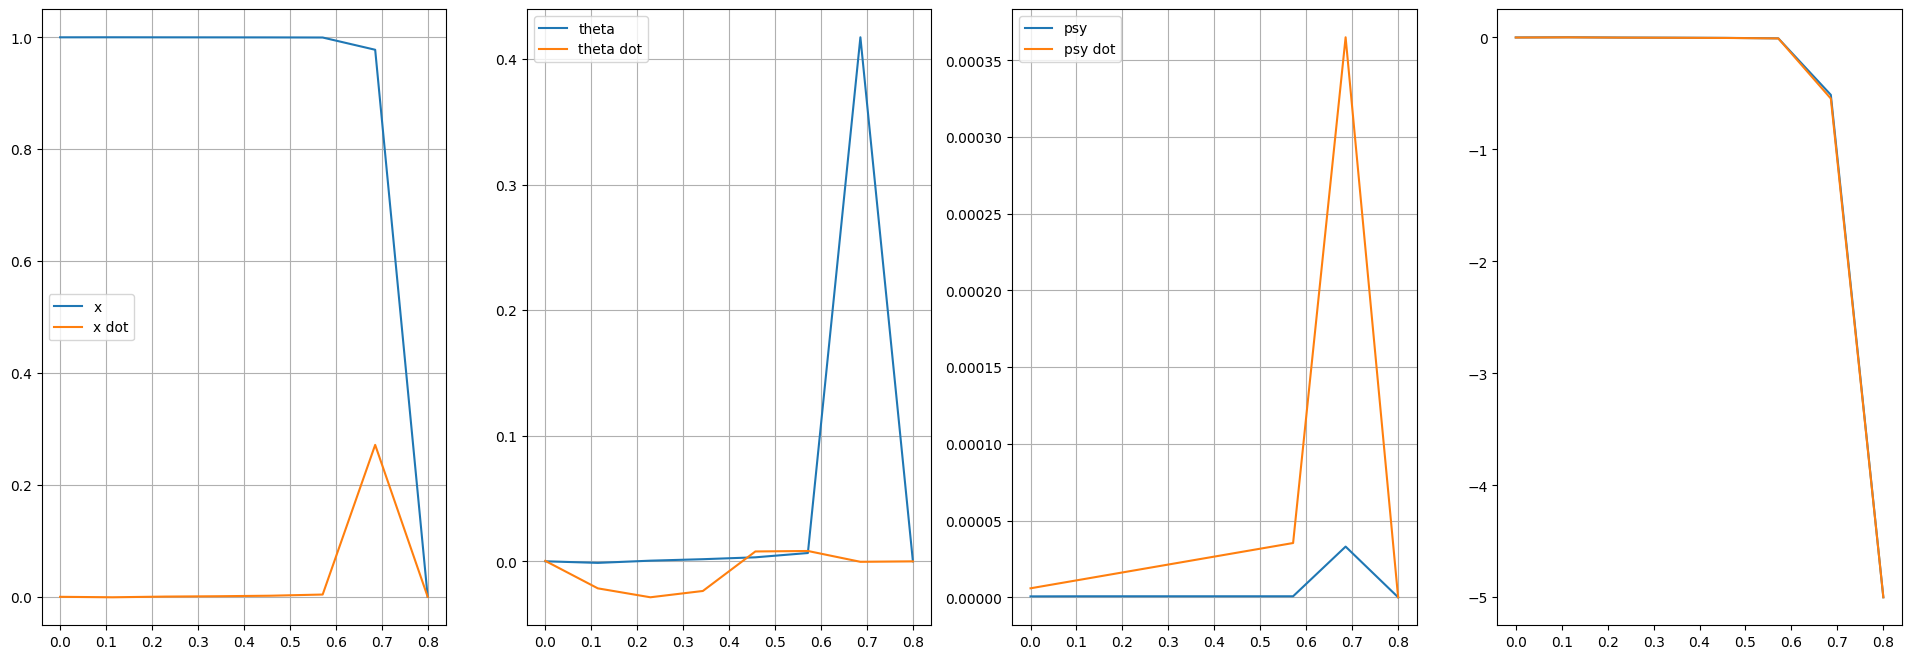

In [18]:
def plot_states(x_states_, u, t):

    plt.subplot(141)

    plt.plot(t, x_states_[:,0], label='x')
    plt.plot(t, x_states_[:,1], label='x dot')
    plt.grid()
    plt.legend()


    plt.subplot(142)

    plt.plot(t, x_states_[:,2], label='theta')
    plt.plot(t, x_states_[:,3], label='theta dot')
    plt.grid()
    plt.legend()


    plt.subplot(143)

    plt.plot(t, x_states_[:,4], label='psy')
    plt.plot(t, x_states_[:,5], label='psy dot')
    plt.grid()
    plt.legend()


    plt.subplot(144)

    u_inputs = u[6:-1].reshape((-1,2))
    plt.plot(t, u_inputs)


plt.figure(figsize=(24,8))
plot_states(x_states, u, np.linspace(0, horizon*t, horizon))


Solution found!
[1.00000005e+00 3.32570872e-05 5.10232949e-05 3.51033794e-04
 5.85628634e-07 5.85620336e-06]
Solution found!
[ 1.00012193e+00 -8.97456174e-04 -1.28926987e-03 -7.51143215e-03
 -3.28015008e-07 -9.13671861e-06]
Solution found!
[ 9.99282206e-01  9.24152320e-03  1.19709908e-02  4.83906505e-02
 -3.28383437e-05 -3.25103306e-04]
Solution found!
[ 9.89930848e-01  1.23318748e-01  2.09597854e-01  1.75201951e+00
 -6.54895401e-05 -3.26511970e-04]
Solution found!
[ 9.80541188e-01  2.80996322e-01  7.92337160e-01  1.11075092e+01
 -9.81036439e-05 -3.26141038e-04]
Solution found!
[ 9.71038534e-01  7.95684680e-01  2.60857861e+00  4.05922123e+01
 -1.30695353e-04 -3.25917087e-04]
Solution found!
[ 9.61183700e-01  2.43855823e+00  8.34555130e+00  1.33965950e+02
 -1.63275336e-04 -3.25799831e-04]
Solution found!
[ 9.95030993e-01  7.10832930e+00  2.56821701e+01  4.24207350e+02
 -1.95855319e-04 -3.25799831e-04]
Error! No solution found


/home/ekter/Documents/python/.venv/lib/python3.12/site-packages/qpsolvers/solvers/clarabel_.py:129: UserWarning: Clarabel.rs terminated with status InsufficientProgress
  warnings.warn(f"Clarabel.rs terminated with status {result.status}")


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 23)

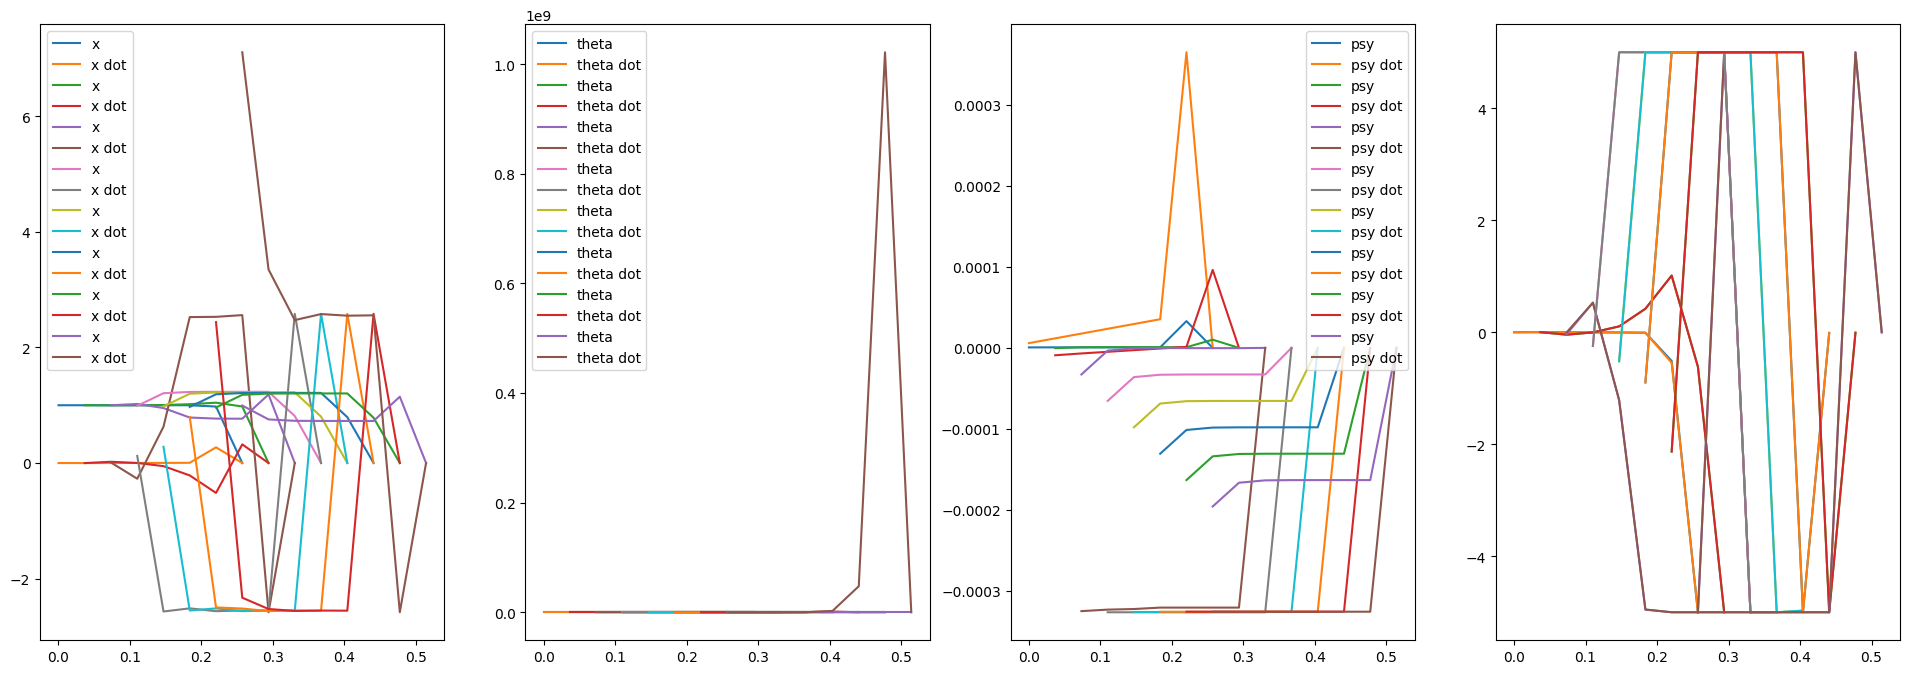

In [19]:
MAX = 10

x0 = np.array([1,0,0,0,0,0])
t = np.linspace(0, MAX+horizon)*t

plt.figure(figsize=(24,8))

for i in range(MAX):
    u = mpc.newMPC(x0, np.array([0,0,0,0,0,0]), horizon=8)
    x0 = (XH@u).reshape((-1,7))[0, 0:6]
    plot_states((XH@u).reshape((-1,7))[:, 0:6], u, t[i:i+horizon])
    print(x0)
